In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/smmh_clean1.csv')

print(df.columns)

Index(['Age', 'Gender', 'Relationship Status', 'Occupation Status',
       'Org. affiliations', 'Do you use social media?',
       'commonly used social media platforms',
       'Average time spent on S.M everyday',
       'How often do you aimlessly browse',
       'Distraction by S.M while busy doing something',
       'restlessness without S.M ', 'how easily distracted are you?',
       'how much are you bothered by worries?', 'difficulty concentrating',
       'rate of social comparison', 'how do you feel social comparisons',
       'rate of seeking online validation ', 'depression frequency ',
       'rate of fluctuation in interest in daily activities', 'insomnia rate'],
      dtype='object')


In [ ]:
# Defining mental health status based on related variables
df['Mental_Health_Status'] = ((df['how much are you bothered by worries?'] > 3) |
                               (df['difficulty concentrating'] > 3) |
                              (df['rate of social comparison'] > 3) |
                              (df['rate of seeking online validation '] > 3) |
                              (df['depression frequency '] > 3) |
                              (df['insomnia rate'] > 3) |
                              (df['rate of fluctuation in interest in daily activities'] > 3) |
                               (df['how easily distracted are you?'] > 3)).astype(int)

# Printing the distribution of the target variable
print(df['Mental_Health_Status'].value_counts())

# saving updated dataset
df.to_csv("updated_dataset.csv", index=False)  # Saved the dataset with the new target variable

Mental_Health_Status
1    387
0     64
Name: count, dtype: int64


In [ ]:
# Logistic Regression for predicting mental health status based on social media behavior

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Defining features (X) and target variable (y)
X = df[['Average time spent on S.M everyday', 'how easily distracted are you?', 'how much are you bothered by worries?', 'difficulty concentrating']]
y = df['Mental_Health_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing one-hot encoding on the categorical columns
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Initialising and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_encoded, y_train)

# Prediction using the trained model
y_pred_log_reg = log_reg.predict(X_test_encoded)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8791208791208791
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.92      0.95      0.93        80

    accuracy                           0.88        91
   macro avg       0.71      0.66      0.68        91
weighted avg       0.87      0.88      0.87        91



In [ ]:
# Random Forest Classifier for predicting mental health status based on social media behavior

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string values in 'Average time spent on S.M everyday' to numerical representations
encoder = LabelEncoder()
X_train['Average time spent on S.M everyday'] = encoder.fit_transform(X_train['Average time spent on S.M everyday'])
X_test['Average time spent on S.M everyday'] = encoder.transform(X_test['Average time spent on S.M everyday'])

# Initialize and train the random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8681318681318682
              precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           1       0.95      0.90      0.92        80

    accuracy                           0.87        91
   macro avg       0.71      0.77      0.73        91
weighted avg       0.89      0.87      0.88        91



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

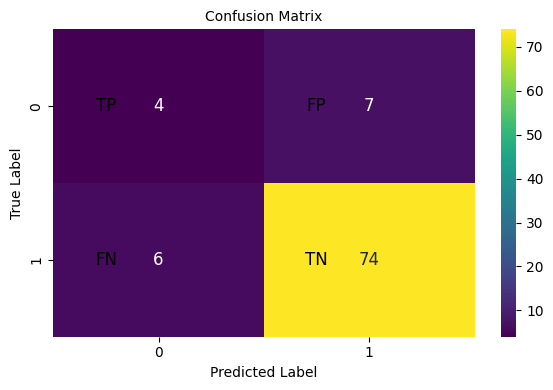

In [ ]:
# Extracting numeric values from strings and converting them to float
df['Average_time_spent_numeric'] = df['Average time spent on S.M everyday'].str.extract(r'(\d+\.?\d*)').astype(float)

# Assuming 'Mental_Health_Status' is the target variable to predict
X = df[['Average_time_spent_numeric', 'how easily distracted are you?', 'how much are you bothered by worries?', 'difficulty concentrating']]
y = df['Mental_Health_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = xgb_classifier.predict(X_test)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', annot_kws={"fontsize": 12})

#heatmap label
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=10)

#adding labels to the heatmap with adjusted positions
plt.text(0.25, 0.5, 'TP', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(1.25, 0.5, 'FP', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(0.25, 1.5, 'FN', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(1.25, 1.5, 'TN', horizontalalignment='center', verticalalignment='center',fontsize=12)

plt.tight_layout() #adjusting layout to prevent overlapping
plt.show()



In [ ]:
conf_matrix

array([[ 2,  6],
       [ 4, 73]])

In [ ]:
y_pred_xgb

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [ ]:
pd.DataFrame(zip(y_test, y_pred_xgb), columns =['actual','pred'])

,actual,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
86,1,1
87,1,0
88,1,1
89,1,1


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [ ]:
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data
X_test_imputed = imputer.transform(X_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_imputed, y_train)

# Predict using the trained model
y_pred_svm = svm_classifier.predict(X_test_imputed)


In [ ]:
# Drop samples with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred_svm = svm_classifier.predict(X_test)


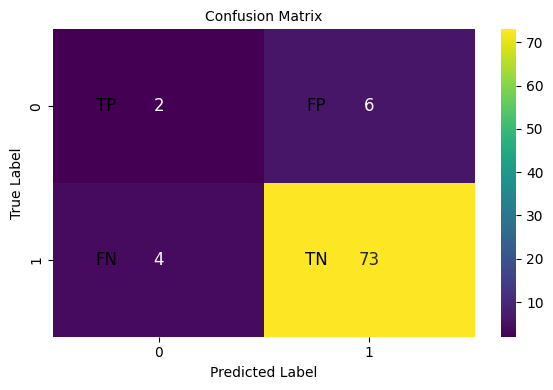

In [ ]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', annot_kws={"fontsize": 12})

#heatmap label
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=10)

#adding labels to the heatmap with adjusted positions
plt.text(0.25, 0.5, 'TP', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(1.25, 0.5, 'FP', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(0.25, 1.5, 'FN', horizontalalignment='center', verticalalignment='center',fontsize=12)
plt.text(1.25, 1.5, 'TN', horizontalalignment='center', verticalalignment='center',fontsize=12)

plt.tight_layout() #adjusting layout to prevent overlapping
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Assuming 'Mental_Health_Status' is the target variable to predict
X = df[['Average_time_spent_numeric', 'how easily distracted are you?', 'how much are you bothered by worries?', 'difficulty concentrating']]
y = df['Mental_Health_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_nn]

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_binary))
print(classification_report(y_test, y_pred_nn_binary))


Epoch 1/50
11/11 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.2222 - val_loss: nan - val_accuracy: 0.1111
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1512 - val_loss: nan - val_accuracy: 0.1111
Epoch 8/50
11/11 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Assuming 'Mental_Health_Status' is the target variable to predict
X = df[['Average_time_spent_numeric', 'how easily distracted are you?', 'how much are you bothered by worries?', 'difficulty concentrating']]
y = df['Mental_Health_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predict using the trained model
y_pred_lgbm = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to binary predictions
y_pred_lgbm_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lgbm]

# Evaluate the model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm_binary))
print(classification_report(y_test, y_pred_lgbm_binary))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War